In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

from numpy import average
from experiments.utilities.hplc_analysis_tools.methods.peak_process_and_visualization import *
from experiments.utilities.hplc_analysis_tools.methods.analysis_methods import *
reaction_folder = r'/Users/luke/PycharmProjects/hydra/experiments/utilities/hplc_analysis_tools/sample_data/hydra_kinova 2021-12-14 11-20-11'
peak_labels_and_times = {'Internal Standard': 2.69, 'Acid': 2.06, 'Intermediate':2.41,
                         'Amide': 2.77, 'Amine': 1.70333333333333}

In [2]:
# plot_reaction_data_raw(reaction_folder=deck.reaction_folder,
#                          labels=deck.peak_labels_and_times,
#                          show_plot=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
-999999999 days, 0:00:00


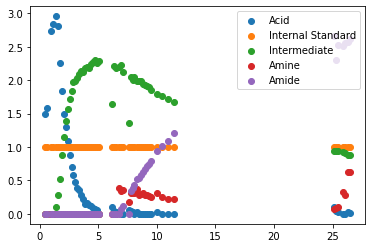

In [3]:
x1 = datetime.datetime.now()
x = plot_reaction_data_concentration(reaction_folder=reaction_folder,
                         labels=peak_labels_and_times,
                                is_rt=2.68,
                         show_plot=True,
                            main_tolerance=0.04)
print((datetime.datetime.now() - x1).min)

In [4]:
# Reaction separation
first_setup_index = min(list(np.where(x.loc[:,'Acid']==0))[0])
second_setup_index = max(list(np.where(x.loc[:,'Amide']==0))[0])

In [5]:
acid_ratio = list(x.loc[:,'Acid'])
first_points = acid_ratio[:2]
second_points = acid_ratio[2:4]

In [6]:
theoretical_acid = [0.5/14,0.5/14,1/14,1/14] + [0]*100
actual_acid = list(first_points)  + list(second_points)+[0]*100

equation is y = 3.557933707261401x + -0.0001812085124122113


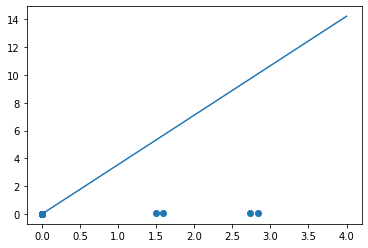

In [7]:
# Make calibration curve for acid (pa)
z = np.polyfit(actual_acid,theoretical_acid , 1)
pa = np.poly1d(z)

d_ratio_acid = average(first_points)
d_ratio2_acid = average(second_points)
d_ratio = average([d_ratio_acid,d_ratio2_acid])
d_acid_mmol = 0.5
is_mmol = 0.1 * (14-0.1 * (2))/14

x_acid_cali = [d_ratio_acid*is_mmol , d_ratio2_acid* is_mmol]
y_acid_cali = [d_acid_mmol,d_acid_mmol*2]
z = np.polyfit(x_acid_cali+[0]*100,y_acid_cali+[0]*100,1)
pa = np.poly1d(z)
# amine_conc = pam(amine_ratio)
acid_conc = [r * (float(pa[1]) * is_mmol)/14 for r in acid_ratio]
second_acid_conc = [r * (float(pa[1]) * is_mmol)/15 for r in acid_ratio]
# def pa_before(xs):
#
#     c = (d_acid_mmol/(is_mmol * d_ratio))/14
#     print(c)
#     if type(xs) is int:
#         return xs*c
#     else:
#         return [x*c for x in xs]
plt.scatter(actual_acid,theoretical_acid)
plt.plot(np.linspace(0,4),pa(np.linspace(0,4)))
b = pa(0)
m = pa(1)-pa(0)
print('equation is y = '+ str(m)+'x + '+ str(b) )

In [8]:
# acid_conc = pa(list(x.loc[:,'Acid'])) # Acid concentration conversion
acid_cali = [acid if acid > 0 else 0 for acid in acid_conc] # Acid concentration calibration to zero
acid0 = max(acid_conc)
acid0_2 = max(second_acid_conc)

In [9]:
int_ratio = list(x.loc[:,'Intermediate'])
amide_ratio = list(x.loc[:,'Amide'])

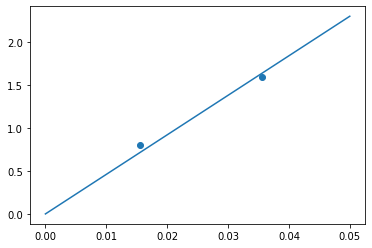

In [10]:
int_conc_curve = [acid0 - acid_cali[i]  if int_ratio[i] > 0 else acid0 - acid_cali[i] for i in range(first_setup_index) ]+ [0] * 100
int_ratio_curve = int_ratio[:first_setup_index] + [0] * 100
z = np.polyfit(int_ratio_curve,int_conc_curve , 1)
pi = np.poly1d(z)

int_conc_curve_2 = [acid0_2 - second_acid_conc[i] for i in range(first_setup_index) ]+ [0] * 100
int_ratio_curve_2 = int_ratio[:first_setup_index] + [0] * 100
z = np.polyfit(int_ratio_curve_2,int_conc_curve_2 , 1)
pi_2 = np.poly1d(z)

int_conc = pi(int_ratio)
for i in range(second_setup_index,len(int_conc)):
    int_conc[i] = pi_2(int_ratio[i])
int_0 =max(int_conc)
int_cali = [int if int > 0 else 0 for int in int_conc]
amide_conc_curve = [acid0_2 - second_acid_conc[i] - int_conc[i]  if amide_ratio[i] > 0 else 0 for i in range(second_setup_index, len(int_conc)) ]
amide_ratio_curve = amide_ratio[second_setup_index:]
z = np.polyfit(amide_ratio_curve,amide_conc_curve , 1)
pad = np.poly1d(z)
amide_conc = pad(amide_ratio)
amide_cali = [amide if amide > 0 else 0 for amide in amide_conc]


amine_ratio = list(x.loc[:,'Amine'])
d_ratio1 = average(amine_ratio[-4:-3]) - amine_ratio[-5]
d_ratio2 = average(amine_ratio[-2:-1]) - amine_ratio[-5]
d_ratio = (d_ratio2+d_ratio1)/2
d_amine_mmol = 0.1
volume_left = 15-0.1 * (len(amine_ratio) -6)
d_conc = d_amine_mmol/(volume_left)
c = d_conc/d_ratio
is_mmol = 0.1 * (15-0.1 * (len(amine_ratio) - 6))/15

# def pam(xs):
#     return [x*c for x in xs]
x_amine_cali = [d_ratio1*is_mmol , d_ratio2* is_mmol]
y_amine_cali = [0.8,1.6]
z = np.polyfit(x_amine_cali+[0]*100,y_amine_cali+[0]*100,1)
pam = np.poly1d(z)
# amine_conc = pam(amine_ratio)
amine_conc = [r * (float(pam[1]) * is_mmol)/15 for r in amine_ratio]
plt.scatter(x_amine_cali,y_amine_cali)
plt.plot(np.linspace(0,0.05),pam(np.linspace(0,0.05)))

Text(0, 0.5, 'Concentration (M)')

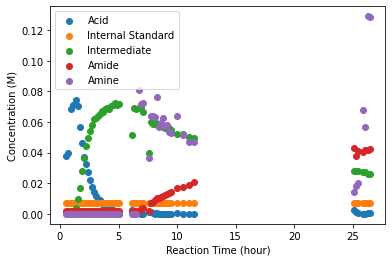

In [11]:
plt.scatter(x['Time'],acid_cali)

is_conc = [0.1/14] * len(acid_conc)
plt.scatter(x['Time'],is_conc)
plt.scatter(x['Time'],int_cali)
plt.scatter(x['Time'],amide_cali)
plt.scatter(x['Time'],amine_conc)
plt.legend(['Acid','Internal Standard','Intermediate','Amide','Amine'])
plt.xlabel('Reaction Time (hour)')
plt.ylabel('Concentration (M)')

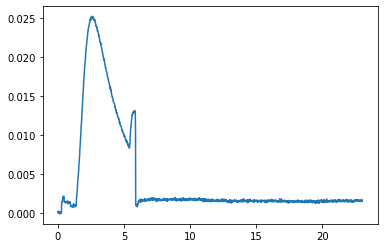

In [12]:
conc = pd.DataFrame([x['Time'].tolist(),acid_conc,is_conc,int_conc,amine_conc,amide_conc])
#,columns=['Time','Acid','Internal Standard','Intermediate','Amide','Amine'])
y = conc.T
y.columns = ['Time','Acid','Internal Standard','Intermediate','Amide','Amine']
from experiments.utilities.ir_analysis_tools.ir_analysis_tools import IRAnalysisTools
ir = IRAnalysisTools('iC IR Experiments/hydra 072_3 Exp 2021-12-14 11-10')
hcdi = ir.get_time_course_height('CDI')
hco2 = ir.get_time_course_height('CO2',plot=True)
time = []
for i in range(len(hcdi)):
    time.append(1/60 * (i+1))
new = pd.concat([y,pd.DataFrame(time),pd.DataFrame(hcdi),pd.DataFrame(hco2)],ignore_index=True, axis=1)
new.columns= ['Time','Acid','Internal Standard','Intermediate','Amide','Amine']+['IR Time','CDI','CO2']
new.to_excel('Hydra_72_conc.xlsx')